In [26]:
#import libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [27]:
sumber = pd.read_csv('application_train.csv')
sumber['Usia'] = (sumber['DAYS_BIRTH']/365).astype(int).abs()
sumber['Jenis_Kelamin'] = sumber['CODE_GENDER'].apply({'M':'Laki-Laki','F':'Perempuan'}.get) 
sumber['Wilayah'] = sumber['REGION_RATING_CLIENT'].apply({1:'Wilayah 1',2:'Wilayah 2', 3:'Wilayah 3'}.get) 
sumber['Total_Kredit'] = sumber['AMT_CREDIT']
sumber['Range_usia'] = np.where(sumber['Usia'] < 30, '20-30',
                       np.where(sumber['Usia'] < 40, '30-40',
                       np.where(sumber['Usia'] < 50, '40-50',
                       np.where(sumber['Usia'] < 60, '50-60', 'Above 60'))))
sumber['Kota'] = sumber['REGION_RATING_CLIENT_W_CITY'].apply({1:'Kota 1',2:'Kota 2', 3:'Kota 3'}.get)

In [28]:
data1 = sumber[['Usia', 'Jenis_Kelamin', 'Range_usia', 'Total_Kredit', 'Wilayah', 'Kota']]
data1.head(10)

,Usia,Jenis_Kelamin,Range_usia,Total_Kredit,Wilayah,Kota
0,25,Laki-Laki,20-30,406597.5,Wilayah 2,Kota 2
1,45,Perempuan,40-50,1293502.5,Wilayah 1,Kota 1
2,52,Laki-Laki,50-60,135000.0,Wilayah 2,Kota 2
3,52,Perempuan,50-60,312682.5,Wilayah 2,Kota 2
4,54,Laki-Laki,50-60,513000.0,Wilayah 2,Kota 2
5,46,Laki-Laki,40-50,490495.5,Wilayah 2,Kota 2
6,37,Perempuan,30-40,1560726.0,Wilayah 2,Kota 2
7,51,Laki-Laki,50-60,1530000.0,Wilayah 3,Kota 3
8,55,Perempuan,50-60,1019610.0,Wilayah 2,Kota 2
9,39,Laki-Laki,30-40,405000.0,Wilayah 2,Kota 2


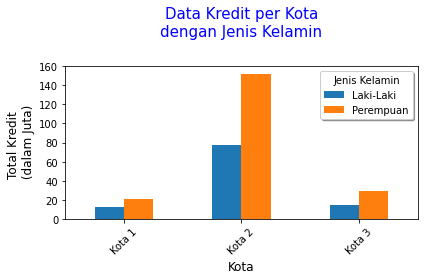

In [29]:
data1.groupby(['Kota','Jenis_Kelamin'])['Total_Kredit'].count().unstack().plot(kind='bar')
plt.title('Data Kredit per Kota\ndengan Jenis Kelamin', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Total Kredit \n (dalam Juta)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Jenis Kelamin')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

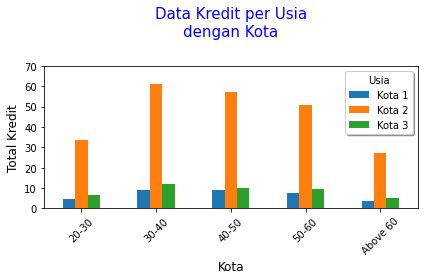

In [30]:
data1.groupby(['Range_usia','Kota'])['Total_Kredit'].count().unstack().plot(kind='bar')
plt.title('Data Kredit per Usia\ndengan Kota', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Total Kredit', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Usia')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
data = pd.read_csv('application_train.csv')
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data = data.drop(data.iloc[:, 33:123], axis=1)

In [34]:
data = data.drop(columns = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH','OWN_CAR_AGE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START'])

In [35]:
data = data.dropna(how='all')

In [36]:
data.drop_duplicates()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,1,0,202500.0,406597.5,0.018801,1,1,0,1,1,0,1.0,2,2
1,0,0,270000.0,1293502.5,0.003541,1,1,0,1,1,0,2.0,1,1
2,0,0,67500.0,135000.0,0.010032,1,1,1,1,1,0,1.0,2,2
3,0,0,135000.0,312682.5,0.008019,1,1,0,1,0,0,2.0,2,2
4,0,0,121500.0,513000.0,0.028663,1,1,0,1,0,0,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,0,0,112500.0,225000.0,0.022800,1,0,0,1,1,0,1.0,2,2
307506,0,0,157500.0,254700.0,0.032561,1,1,0,1,0,0,1.0,1,1
307507,0,0,72000.0,269550.0,0.025164,1,0,0,1,1,0,1.0,2,2
307508,0,0,153000.0,677664.0,0.005002,1,1,0,1,0,1,1.0,3,3


In [37]:
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].mean(),inplace=True)

In [38]:
data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,0.020868,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521
std,0.272419,0.722121,2.371231e+05,4.024908e+05,0.013831,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737
min,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,0.010006,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,0.018850,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,0.028663,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,0.072508,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000


In [39]:
def outliers (a):
    Q1 = data[a].quantile(0.25)
    Q3 = data[a].quantile(0.75)
    IQR = Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    out1=data[(data[a]<lower)].values
    out2=data[(data[a]>upper)].values
    data[a].replace(out1, lower, inplace=True)
    data[a].replace(out2, upper, inplace=True)
    out_income= data[(data[a]<lower)|(data[a]>upper)].index
    data.drop(out_income,inplace=True)

<AxesSubplot:>

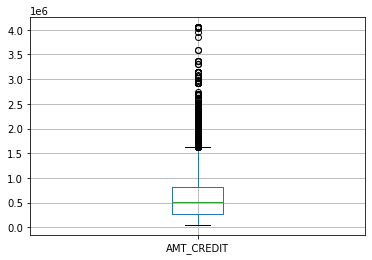

In [40]:
data.boxplot(column=['AMT_CREDIT'])

In [41]:
data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:>

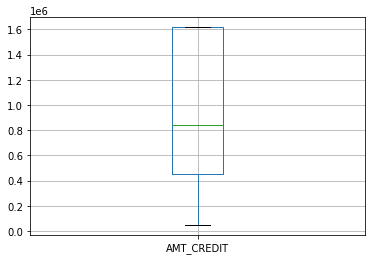

In [42]:
outliers('AMT_CREDIT')
data.boxplot(column=['AMT_CREDIT'])

In [43]:
dataset = data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234584 entries, 0 to 307509
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       234584 non-null  int64  
 1   CNT_CHILDREN                 234584 non-null  int64  
 2   AMT_INCOME_TOTAL             234584 non-null  float64
 3   AMT_CREDIT                   234584 non-null  float64
 4   REGION_POPULATION_RELATIVE   234584 non-null  float64
 5   FLAG_MOBIL                   234584 non-null  int64  
 6   FLAG_EMP_PHONE               234584 non-null  int64  
 7   FLAG_WORK_PHONE              234584 non-null  int64  
 8   FLAG_CONT_MOBILE             234584 non-null  int64  
 9   FLAG_PHONE                   234584 non-null  int64  
 10  FLAG_EMAIL                   234584 non-null  int64  
 11  CNT_FAM_MEMBERS              234584 non-null  float64
 12  REGION_RATING_CLIENT         234584 non-null  int64  
 13 

In [44]:
dataset.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,1,0,202500.0,406597.5,0.018801,1,1,0,1,1,0,1.0,2,2
1,0,0,270000.0,1293502.5,0.003541,1,1,0,1,1,0,2.0,1,1
2,0,0,67500.0,1616625.0,0.010032,1,1,1,1,1,0,1.0,2,2
3,0,0,135000.0,312682.5,0.008019,1,1,0,1,0,0,2.0,2,2
4,0,0,121500.0,1616625.0,0.028663,1,1,0,1,0,0,1.0,2,2


In [45]:
X = dataset.iloc[:, 1:16]
y = dataset.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [47]:
#Risk Model Building Logistic Regression
lReg = LogisticRegression()
lReg.fit(X_train, y_train)
y_pred = lReg.predict(X_test)

In [48]:
print(confusion_matrix(y_test, y_pred))

[[42223     0]
 [ 4694     0]]


In [49]:
print(accuracy_score(y_test, y_pred))

0.8999509772577104


In [50]:
#Build KNN 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [51]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print('Convusion Matrix\n',cm)
print('Accuracy Model KNN\n', ac)

Convusion Matrix
 [[41799   424]
 [ 4630    64]]
Accuracy Model KNN
 0.892277852377603
